#**PROBLEMA DE NEGOCIO**


---




La necesidad de prever y optimizar el gasto de sus usuarios ha llevado a una empresa de comercio electrónico a buscar soluciones innovadoras. Como científicos de datos, hemos sido convocados para desarrollar un modelo de machine learning que pueda predecir con precisión cuánto gastará un usuario al visitar dicho sitio web.

### **Tus tareas principales serán:**

**1. Preprocesamiento de Datos:** Importar correctamente y analizar y comprender el conjunto de datos proporcionado, realizar limpieza de datos, eliminar atributos que no aportan valor y manejar valores faltantes.

**2. Exploración y Feature Engineering:** Realizar visualizaciones para entender las relaciones entre las variables y seleccionar las características relevantes, identificar variables llaves, codificación de variables categóricas y normalización/escalado de datos.

**3. Construcción de Modelos:** Experimentar con algunos algoritmos de machine learning como Linear Regression, Decision Tree Regressor, Random Forest Regressor, entre otros.

**4. Evaluación y Selección del Modelo:** Evaluar los modelos utilizando métricas como el error cuadrático medio (MSE), la raíz cuadrada del error cuadrático medio (RMSE) y el coeficiente de determinación (R²). Seleccionar el modelo con el mejor rendimiento para la predicción del gasto de los usuarios.

#**1. Configuración del Ambiente**


---




In [1]:
#importamos la librerías con las cuales trabajaremos
import wget
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
#import xgboost as xgb
#import lightgbm as lgb
from sklearn.preprocessing import FunctionTransformer
from joblib import dump, load
from scipy.stats import norm
#Definiendo las variables globales
global df_traffic, resultados, modelo, modelo_clasificacion

In [3]:
from funpymodeling.exploratory import freq_tbl


#**2. Preprocesamiento de Datos**


---


In [4]:
#Extraemos los datos con pandas y consultamos los primeros 5 valores para analizar la información que contiene el DataFrame
df = pd.read_csv('https://raw.githubusercontent.com/ElProfeAlejo/Bootcamp_Databases/main/traffic_site.csv')
df.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9674781571160116268,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",9674781571160116268_1472804607,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472804607,1,1472804607
1,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",8590648239310839049,"{""continent"": ""Europe"", ""subContinent"": ""Easte...",8590648239310839049_1472835928,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472835928,1,1472835928
2,Affiliates,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9772828344252850532,"{""continent"": ""Americas"", ""subContinent"": ""Sou...",9772828344252850532_1472856802,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""Data Share Promo"", ""source"": ""Pa...",1472856802,1,1472856802
3,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472879649,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472879649,2,1472879649
4,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472829671,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""5"", ""pageviews"": ""4"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472829671,1,1472829671


In [5]:
#Varificamos el número de columnas y el tipo de datos contenidos en el DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12283 entries, 0 to 12282
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   channelGrouping       12283 non-null  object
 1   date                  12283 non-null  int64 
 2   device                12283 non-null  object
 3   fullVisitorId         12283 non-null  uint64
 4   geoNetwork            12283 non-null  object
 5   sessionId             12283 non-null  object
 6   socialEngagementType  12283 non-null  object
 7   totals                12283 non-null  object
 8   trafficSource         12283 non-null  object
 9   visitId               12283 non-null  int64 
 10  visitNumber           12283 non-null  int64 
 11  visitStartTime        12283 non-null  int64 
dtypes: int64(4), object(7), uint64(1)
memory usage: 1.1+ MB


In [6]:
#Extraemos el contenido del DataFrame y aplicamos la función preprocesamiento y tomamos una muestra para verificar las columnas desplegadas
df_traffic = pd.read_csv('https://raw.githubusercontent.com/ElProfeAlejo/Bootcamp_Databases/main/traffic_site.csv', dtype={'date':object,'fullVisitorId':object,'visitId':object})
df_traffic.sample(5)

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
8341,Referral,20170215,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",3814369520867401177,"{""continent"": ""Europe"", ""subContinent"": ""North...",3814369520867401177_1487155954,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""2"", ""pageviews"": ""2"",...","{""referralPath"": ""/"", ""campaign"": ""(not set)"",...",1487155954,1,1487155954
6226,Direct,20170711,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",864287901762680536,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",864287901762680536_1499787168,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""(direct)""...",1499787168,1,1499787168
6210,Direct,20170502,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",0268585089592340200,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",0268585089592340200_1493770757,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""4"", ""pageviews"": ""4"",...","{""campaign"": ""(not set)"", ""source"": ""(direct)""...",1493770757,1,1493770757
8998,Organic Search,20170130,"{""browser"": ""Internet Explorer"", ""browserVersi...",3147137286511806161,"{""continent"": ""Europe"", ""subContinent"": ""North...",3147137286511806161_1485787885,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1485787885,1,1485787885
8655,Paid Search,20170209,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9263821517301229323,"{""continent"": ""Europe"", ""subContinent"": ""Easte...",9263821517301229323_1486665068,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1486665068,1,1486665068


In [7]:
#Verificamos el número de columnas y filas contenidas en el DataFrame y su tipo de dato asignado a cada una
df_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12283 entries, 0 to 12282
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   channelGrouping       12283 non-null  object
 1   date                  12283 non-null  object
 2   device                12283 non-null  object
 3   fullVisitorId         12283 non-null  object
 4   geoNetwork            12283 non-null  object
 5   sessionId             12283 non-null  object
 6   socialEngagementType  12283 non-null  object
 7   totals                12283 non-null  object
 8   trafficSource         12283 non-null  object
 9   visitId               12283 non-null  object
 10  visitNumber           12283 non-null  int64 
 11  visitStartTime        12283 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 1.1+ MB


In [8]:
def preprocesamiento():
    global df_traffic

    # Extraer datos de diccionarios
    diccionarios = ['device','geoNetwork','trafficSource','totals']
    for columna in diccionarios:
        df_traffic = df_traffic.join(pd.DataFrame([json.loads(linea) for linea in df_traffic[columna]]))
    df_traffic = df_traffic.drop(columns=diccionarios)
    # o puedo ustilizar esta otra opción df_traffic.drop(columns=diccionarios, inplace=True)

    #Eliminar las columnas que no requerimos
    df_traffic= df_traffic.drop(columns=['socialEngagementType','browserVersion','browserSize','operatingSystemVersion','mobileDeviceBranding','mobileDeviceModel','mobileInputSelector','mobileDeviceInfo','mobileDeviceMarketingName','flashVersion','language','screenColors','screenResolution','continent','subContinent','country','region','cityId','latitude','longitude','networkLocation','keyword','adwordsClickInfo','isTrueDirect','adContent','campaignCode','networkDomain','visits'])

    # Eliminar duplicados
    df_traffic = df_traffic.drop_duplicates()

    # Reemplazar textos por números
    cuant = ['bounces', 'hits','newVisits','pageviews', 'transactionRevenue']
    for columna in cuant:
        df_traffic[columna] = pd.to_numeric(df_traffic[columna])
    df_traffic[cuant] = df_traffic[cuant].fillna(0)
    df_traffic['transactionRevenue'] = df_traffic['transactionRevenue'] / 1000000


   # Reemplazar números por fechas
    df_traffic['date'] = pd.to_datetime(df_traffic['date'], format='%Y%m%d')
    df_traffic['visitStartTime'] = pd.to_datetime(df_traffic['visitStartTime'], unit='s')
    df_traffic.bounces = df_traffic.bounces.astype(int)
    df_traffic.newVisits = df_traffic.newVisits.astype(int)



preprocesamiento()
df_traffic.sample(5)

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,browser,operatingSystem,isMobile,deviceCategory,metro,city,campaign,source,medium,referralPath,hits,pageviews,bounces,newVisits,transactionRevenue
10005,Social,2016-09-26,2765771649289000245,2765771649289000245_1474945704,1474945704,1,2016-09-27 03:08:24,Safari,Macintosh,False,desktop,(not set),Bangkok,(not set),youtube.com,referral,/yt/about/th/,1,1,1,1,0.0
5270,Social,2016-11-02,1672738281474968984,1672738281474968984_1478109093,1478109093,1,2016-11-02 17:51:33,Chrome,Windows,False,desktop,(not set),Lahore,(not set),youtube.com,referral,/yt/about/en-GB/,1,1,1,1,0.0
7559,Referral,2017-02-20,5906198488073740487,5906198488073740487_1487585643,1487585643,1,2017-02-20 10:14:03,Chrome,Windows,False,desktop,not available in demo dataset,not available in demo dataset,(not set),google.com,referral,/intl/ja_ALL/permissions/using-the-logo.html,7,7,0,1,0.0
5602,Referral,2017-03-13,3019465731757456574,3019465731757456574_1489439719,1489439719,1,2017-03-13 21:15:19,Chrome,Macintosh,False,desktop,Los Angeles CA,Los Angeles,(not set),siliconvalley.about.com,referral,/od/Things-To-Do-in-Silicon-Valley/fl/How-To-V...,4,4,0,1,0.0
8850,Direct,2016-12-06,4534944335715987894,4534944335715987894_1481083129,1481083129,1,2016-12-07 03:58:49,Safari,iOS,True,mobile,not available in demo dataset,not available in demo dataset,(not set),(direct),(none),NaN,2,2,0,1,0.0


In [9]:
df_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12283 entries, 0 to 12282
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   channelGrouping     12283 non-null  object        
 1   date                12283 non-null  datetime64[ns]
 2   fullVisitorId       12283 non-null  object        
 3   sessionId           12283 non-null  object        
 4   visitId             12283 non-null  object        
 5   visitNumber         12283 non-null  int64         
 6   visitStartTime      12283 non-null  datetime64[ns]
 7   browser             12283 non-null  object        
 8   operatingSystem     12283 non-null  object        
 9   isMobile            12283 non-null  bool          
 10  deviceCategory      12283 non-null  object        
 11  metro               12283 non-null  object        
 12  city                12283 non-null  object        
 13  campaign            12283 non-null  object    

In [10]:
#Normalizamos el tipo de información extrayendo de las columnas que contiene información anidada tipo JSON y lo almacenamos en una nueva variable
df_traffic_device = pd.json_normalize(df['device'].apply(json.loads))
df_traffic_geoNetwork = pd.json_normalize(df['geoNetwork'].apply(json.loads))
df_traffic_trafficSource = pd.json_normalize(df['trafficSource'].apply(json.loads))
df_traffic_totals = pd.json_normalize(df['totals'].apply(json.loads))

df_final = pd.concat([df, df_traffic_device, df_traffic_geoNetwork, df_traffic_trafficSource, df_traffic_totals], axis=1)



In [11]:
#Verificamos el desgloce de los datos de las columnas anidadas a través de una muestra de 5 elementos
df_final.sample(5)

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime,browser,browserVersion,browserSize,operatingSystem,operatingSystemVersion,isMobile,mobileDeviceBranding,mobileDeviceModel,mobileInputSelector,mobileDeviceInfo,mobileDeviceMarketingName,flashVersion,language,screenColors,screenResolution,deviceCategory,continent,subContinent,country,region,metro,city,cityId,networkDomain,latitude,longitude,networkLocation,campaign,source,medium,keyword,adwordsClickInfo.criteriaParameters,isTrueDirect,referralPath,adwordsClickInfo.page,adwordsClickInfo.slot,adwordsClickInfo.gclId,adwordsClickInfo.adNetworkType,adwordsClickInfo.isVideoAd,adContent,campaignCode,visits,hits,pageviews,bounces,newVisits,transactionRevenue
1823,Organic Search,20170116,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",5206238526859107090,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",5206238526859107090_1484588730,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""6"", ""pageviews"": ""5"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1484588730,1,1484588730,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,cox.net,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),google,organic,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,6,5,NaN,1,NaN
9706,Direct,20170301,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1442489746869891358,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1442489746869891358_1488388931,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""(direct)""...",1488388931,2,1488388931,Chrome,not available in demo dataset,not available in demo dataset,Linux,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,Northern America,United States,California,San Francisco-Oakland-San Jose CA,Mountain View,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),(direct),(none),NaN,not available in demo dataset,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1,NaN,NaN
4470,Organic Search,20170216,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",979739040269771772,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",0979739040269771772_1487276474,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""3"", ""pageviews"": ""3"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1487276474,1,1487276474,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,unknown.unknown,not available in demo dataset,not available in 

In [12]:
#Verificamos nuevamento el número de columnas y filas después de extraer el JSON
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12283 entries, 0 to 12282
Data columns (total 59 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   channelGrouping                      12283 non-null  object
 1   date                                 12283 non-null  int64 
 2   device                               12283 non-null  object
 3   fullVisitorId                        12283 non-null  uint64
 4   geoNetwork                           12283 non-null  object
 5   sessionId                            12283 non-null  object
 6   socialEngagementType                 12283 non-null  object
 7   totals                               12283 non-null  object
 8   trafficSource                        12283 non-null  object
 9   visitId                              12283 non-null  int64 
 10  visitNumber                          12283 non-null  int64 
 11  visitStartTime                       1228

In [13]:
#Borramos las columnas que contienen los JSON anidados
df_final.drop(columns=['device', 'geoNetwork', 'trafficSource', 'totals'], inplace=True)

In [14]:
#Verificamos nuevamente el número de columnas sin aquellas anidadas
# Convertir la columna 'date' a tipo datetime si aún no lo está
df_final['date'] = pd.to_datetime(df_traffic['date'])
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12283 entries, 0 to 12282
Data columns (total 55 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   channelGrouping                      12283 non-null  object        
 1   date                                 12283 non-null  datetime64[ns]
 2   fullVisitorId                        12283 non-null  uint64        
 3   sessionId                            12283 non-null  object        
 4   socialEngagementType                 12283 non-null  object        
 5   visitId                              12283 non-null  int64         
 6   visitNumber                          12283 non-null  int64         
 7   visitStartTime                       12283 non-null  int64         
 8   browser                              12283 non-null  object        
 9   browserVersion                       12283 non-null  object        
 10  browserSiz

In [15]:
# Crear un diccionario para almacenar el número de valores únicos por columna
valores_unicos_por_columna = {}

# Iterar sobre todas las columnas del DataFrame
for columna in df_final.columns:
    # Calcular el número de valores únicos en la columna actual y almacenarlo en el diccionario
    valores_unicos_por_columna[columna] = len(df_final[columna].unique())

# Imprimir el número de valores únicos por columna
for columna, valores_unicos in valores_unicos_por_columna.items():
    print(f"La columna '{columna}' tiene {valores_unicos} valores únicos.")


La columna 'channelGrouping' tiene 8 valores únicos.
La columna 'date' tiene 366 valores únicos.
La columna 'fullVisitorId' tiene 9996 valores únicos.
La columna 'sessionId' tiene 12276 valores únicos.
La columna 'socialEngagementType' tiene 1 valores únicos.
La columna 'visitId' tiene 12272 valores únicos.
La columna 'visitNumber' tiene 50 valores únicos.
La columna 'visitStartTime' tiene 12279 valores únicos.
La columna 'browser' tiene 22 valores únicos.
La columna 'browserVersion' tiene 1 valores únicos.
La columna 'browserSize' tiene 1 valores únicos.
La columna 'operatingSystem' tiene 12 valores únicos.
La columna 'operatingSystemVersion' tiene 1 valores únicos.
La columna 'isMobile' tiene 2 valores únicos.
La columna 'mobileDeviceBranding' tiene 1 valores únicos.
La columna 'mobileDeviceModel' tiene 1 valores únicos.
La columna 'mobileInputSelector' tiene 1 valores únicos.
La columna 'mobileDeviceInfo' tiene 1 valores únicos.
La columna 'mobileDeviceMarketingName' tiene 1 valores

#**3. Exploración y Feature Engineering**


---


In [113]:
#Agregamos nuevas columnas a partir de las columnas "date" y "visitStartTime" para tener más información capaz de resolver preguntas con base en los datos
def feature_engineering():
    global df_traffic, resultados, modelo, modelo_clasificacion
    
    # Crear las nuevas columnas
    df_traffic['year'] = df_traffic['date'].apply(lambda x:x.year)
    df_traffic['month'] = df_traffic['date'].dt.month  # Mes
    df_traffic['quarterMonth'] = df_traffic['date'].dt.quarter  # Trimestre del mes
    df_traffic['day'] = df_traffic['date'].dt.day  # Día
    df_traffic['weekday'] = df_traffic['date'].dt.weekday  # Día de la semana (0: Lunes, 1: Martes, ..., 6: Domingo)
    
    df_traffic["hour"] = df_traffic["visitStartTime"].dt.hour

feature_engineering()   

In [138]:
#Realizamos la consulta de número de columnas
df_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12283 entries, 0 to 12282
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   channelGrouping     12283 non-null  object        
 1   date                12283 non-null  datetime64[ns]
 2   fullVisitorId       12283 non-null  object        
 3   visitNumber         12283 non-null  int64         
 4   visitStartTime      12283 non-null  datetime64[ns]
 5   browser             12283 non-null  object        
 6   operatingSystem     12283 non-null  object        
 7   isMobile            12283 non-null  bool          
 8   deviceCategory      12283 non-null  object        
 9   metro               12283 non-null  object        
 10  city                12283 non-null  object        
 11  campaign            12283 non-null  object        
 12  source              12283 non-null  object        
 13  medium              12283 non-null  object    

#**3.1 Analisis Univariable de las variables categóricas del Dataset**


---


#1.- freq_tbl(df_traffic["channelGrouping"]) #Aporta información valiosa entre 7 categorías, sin Datos Nulos

#2.- freq_tbl(df_traffic["fullVisitorId"]) #Aporta en un porcentaje pequeño información relevante
#De la columna frequency 8780 de los 12283 registros, cuentan con frecuencia de 1 y 784 con fecuencia de 2 = 9564, dando un porcentaje acumulado de los primeros 2 valores del 77.92%, por lo tanto, fuera de esas dos opciones la cantidad de información para trabajar con el modelo termina siendo muy pequeña, sin embargo, se conservará la columna

#3.- freq_tbl(df_traffic["sessionId"]) #El Esquema de BigQuery lo determina como obsoleto y recomienda usar fullVisitorId en su lugar, por lo tanto, SE ELIMINA

#4.- freq_tbl(df_traffic["visitId"]) #Solo 11 valores de los 12,272 registros tienen una frecuencia de 2, todos los demás una frecuencia de 1, por lo tanto al ser tan poca la información para comparar, SE ELIMINA LA COLUMNA

#5.- freq_tbl(df_traffic["browser"]) #Aporta información Valiosa con una distribución de más del 90% de los datos en las primeras 3 categorías 

#6.- freq_tbl(df_traffic["operatingSystem"]) #Aporta información valiosa con una distribución de más del 90% de los datos en las primeras 4 categorías

#7.- freq_tbl(df_traffic["deviceCategory"]) #Aporta información importante distribuída en 3 categorías 

#8.- freq_tbl(df_traffic["metro"]) #el 77.7 % son datos nulos, sin embargo, se conservarán los pocos datos al ser un área de mercado designada desde la que se originan las sesiones

#9.- freq_tbl(df_traffic["city"]) #Variable que aporta la ciudad de los usuarios, extraída de las direcciones IP o de los IDs geográficos, sin embargo, cuenta con más de un 50% de datos nulos. Se conserva

#10.- freq_tbl(df_traffic["campaign"]) #Variable con 95% de valores no establecidos, a consideración a borrarla, se probará su peso en el modelo

#11.- freq_tbl(df_traffic["source"]) #Aporta información valiosa, el 93% de los datos dentros de sus primeras 5 categorías

#12.- freq_tbl(df_traffic["medium"]) #cuenta con un 16% de nulos, sin embargo, aporta información valiosa del medio de la fuente de tráfico

#13.- freq_tbl(df_traffic["referralPath"]) #Verificamos la información aportada por la columna, en este caso, la columna cuenta con menos de 200 registros de las 12276 filas, de los cuales ninguno aporta información importante, por lo mismo, se decide ser eliminado del modelo.


Explicación parametros de Fuente de Trafico [medium]

Tráfico orgánico ("organic"): Este tipo de tráfico proviene de los resultados de búsqueda orgánica en los motores de búsqueda como Google, Bing, Yahoo, entre otros. Es decir, cuando los usuarios encuentran y visitan el sitio web haciendo clic en un enlace que aparece en los resultados de búsqueda sin haber pagado por la posición.

Coste por clic ("cpc"): También conocido como tráfico de pago por clic, se refiere al tráfico que llega al sitio web a través de anuncios de pago en motores de búsqueda, redes de anuncios o plataformas de publicidad en línea. Los anunciantes pagan cada vez que un usuario hace clic en su anuncio y es dirigido al sitio web.

Referencia ("referral"): Este tipo de tráfico proviene de enlaces en otros sitios web diferentes a los motores de búsqueda. Por ejemplo, si otro sitio web incluye un enlace al sitio web en su contenido y los usuarios hacen clic en ese enlace para visitar el sitio, se considera tráfico de referencia.

A través de la librería funpymodeling a través de su función freq_tbl, realizará análisis univariable de las variables categóricas del dataset para determinar en cada fila su frecuencia, su representanción porcentaje y porcentaje acumulado, para usar esta función únicamente es necesario agregar el nombre del DataFrame y de manera automática dará la relación de las variables CATEGÓRICAS, sin embargo. también puede accederse para realizarlo a través de la subconsulta de la columna específica a consultar. 

Ejemplo : freq_tbl(df["Nombre_columna"])

In [306]:
#Función utilizada para el analisis univariable de las columnas con datos categóricos
freq_tbl(df_traffic["channelGrouping"])

,channelGrouping,frequency,percentage,cumulative_perc
0,Organic Search,5155,0.419686,0.419686
1,Social,3052,0.248473,0.668159
2,Direct,2011,0.163722,0.831881
3,Referral,1438,0.117072,0.948954
4,Paid Search,310,0.025238,0.974192
5,Affiliates,236,0.019214,0.993406
6,Display,77,0.006269,0.999674
7,(Other),4,0.000326,1.000000


In [ ]:
def analyze_city_data(df, columna):
    
    # Mostrar el conteo de los 10 valores que MÁS se repiten en la información de las primeras filas de la columna asignada
    print("\nConteo de los 10 valores que MÁS se repiten en las primeras filas de la columna asignada:")
    print(df[columna].value_counts().head(10))
    

    # Mostrar los primeros valores en orden descendente de la columna asignada
    print("\nPrimeros valores de la columna asignada")
    print(df[columna].head(10))



    # Mostrar estadísticas descriptivas de la columna asignada
    print("\nEstadísticas descriptivas de la columna asignada")
    print(df[columna].describe())

# Llamar a la función con el DataFrame df_traffic
analyze_city_data(df_traffic, "city")


In [128]:
def buscar_repetidos(df, columna, valor_frecuencia):
    # Contar la frecuencia de cada dato dentro de las filas de la columna especificada
    frecuencia_datos = df[columna].value_counts()

    # Filtrar los datos que tienen una frecuencia igual al valor especificado
    datos_frecuencia_var = frecuencia_datos[frecuencia_datos == valor_frecuencia]

    # Mostrar los datos que aparecen con la frecuencia especificada
    print("Datos con frecuencia de", valor_frecuencia, "en la columna", columna, ":")
    print(datos_frecuencia_var)

# Llamar a la función con los parámetros adecuados
buscar_repetidos(df_traffic, "city", 10) # Cambia "city" por la columna deseada y 10 por el valor de frecuencia buscado


Datos con frecuencia de 10 en la columna city :
city
Hamburg    10
Name: count, dtype: int64


In [153]:
df_traffic["isMobile"].describe(include = all)

count     12283
unique        2
top       False
freq       8978
Name: isMobile, dtype: object

In [199]:
df_traffic["isMobile"].value_counts()

isMobile
False    8978
True     3305
Name: count, dtype: int64

In [252]:
df_traffic["bounces"].value_counts()

bounces
True     6172
False    6111
Name: count, dtype: int64

In [259]:
df_traffic["newVisits"].value_counts()

newVisits
True     9445
False    2838
Name: count, dtype: int64

In [255]:

df_traffic["bounces"] = df_traffic["bounces"].astype('bool')
df_traffic["newVisits"] = df_traffic["newVisits"].astype('bool')


In [132]:
#Se eliminan las 3 columnas que menos aportan información al modelo de acuerdo al analisis univariable anterior
df_traffic.drop(columns=['referralPath', "sessionId", "visitId"], inplace=True)

#**3.2 Analisis univariable de las variables continuas del Dataset**


---

1.- Columna visitNumber se conserva sin cambios, pese a representar en un 76.84% del total de los datos una sola visita

2.- Columna Hits se conserva, únicamente reemplazando el Outlayer de 471 a la media del total de los datos con el número 4

3.- Columna pageviews se conserva sin cambios, pese a representar en un 66% del total de los datos en las primeras dos paginas y reemplazando el outlayer de 305 por el valor de la media

4.- Columna Bounces al solo contener dos valores ha sido transformada por una variable booleana de acuerdo a la descripción proporcionada de la variable: Total de rebotes (por comodidad). En el caso de una sesión rebotada, el valor es 1; de lo contrario, es nulo. 

5.- Columna newVisits al solo contener dos valores ha sido transformada por una variable booleana de acuerdo a la descripción proporcionada de la variable: Número total de usuarios nuevos de la sesión (por comodidad). Si es su primera sesión, este valor es 1; de lo contrario, es nulo.

6.- Columna transactionRevenue se conserva sin cambios, pese a representar en un 98.66 del total de los datos, una compra de cero, dejando únicamente una cantidad de 164 datos para trabajar con el modelo

Cambios en las variable númericas.

In [232]:
# Reemplazar el outlayer de 471 en la columna "hits" por 4, la media del total de la columna
# Reemplazar el outlayer de 305 en la columna "pageviews" por 3, la media del total de la columna
df_traffic["hits"].replace(471, 4, inplace=True)
df_traffic["pageviews"].replace(305, 3, inplace=True)

In [152]:
#Ajustamos los parametros de visualización
%matplotlib inline
sns.set_style(style = "whitegrid")
sns.set_context(context = "notebook")
plt.rcParams["figure.figsize"] = (9,7)

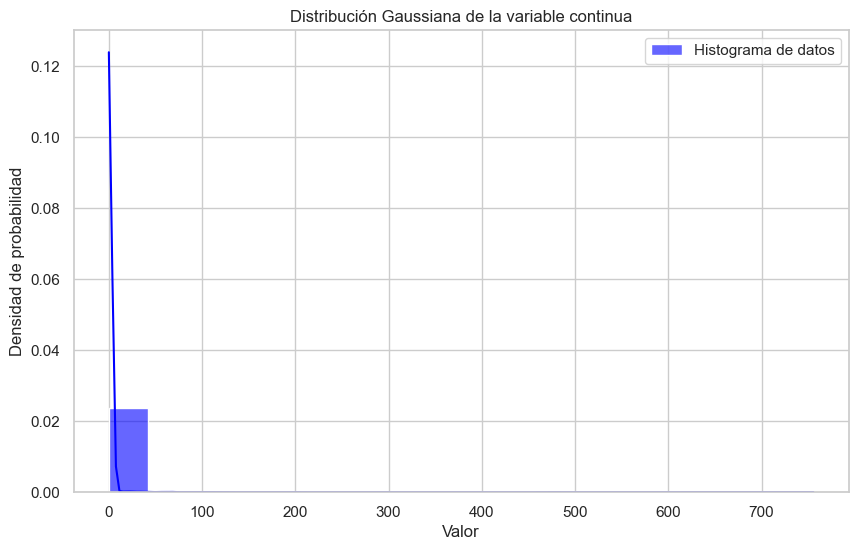

In [285]:
def plot_gaussian_distribution(data, bins=18, color='blue'):
    # Calcular la media y la desviación estándar de los datos
    mu, sigma = np.mean(data), np.std(data)

    # Crear un gráfico con Seaborn
    plt.figure(figsize=(10, 6))
    
    # Crear histograma con distribución gaussiana
    sns.histplot(data, bins=bins, kde=True, color=color, alpha=0.6, stat='density', label='Histograma de datos')
    
    # Añadir leyenda y etiquetas
    plt.legend()
    plt.xlabel('Valor')
    plt.ylabel('Densidad de probabilidad')
    plt.title('Distribución Gaussiana de la variable continua')
    
    # Mostrar la gráfica
    plt.show()

# Ejemplo de uso
data = np.random.normal(loc=0, scale=1, size=1000)  # Datos generados aleatoriamente con distribución normal
plot_gaussian_distribution(df_traffic["transactionRevenue"])


In [286]:
df_traffic["transactionRevenue"].describe()

count    12283.000000
mean         1.447871
std         20.893896
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        755.630000
Name: transactionRevenue, dtype: float64

In [289]:
df_traffic["transactionRevenue"].value_counts().head(10)

transactionRevenue
0.00     12119
13.59        3
33.59        3
19.19        3
27.19        2
69.99        2
1.99         2
5.97         2
18.99        2
55.99        2
Name: count, dtype: int64

In [288]:
df_traffic["transactionRevenue"].value_counts().sort_index(ascending=False).head()

transactionRevenue
755.63    1
702.90    1
633.16    1
556.61    1
552.50    1
Name: count, dtype: int64

In [ ]:
df_traffic["transactionRevenue"].unique()

<Axes: >

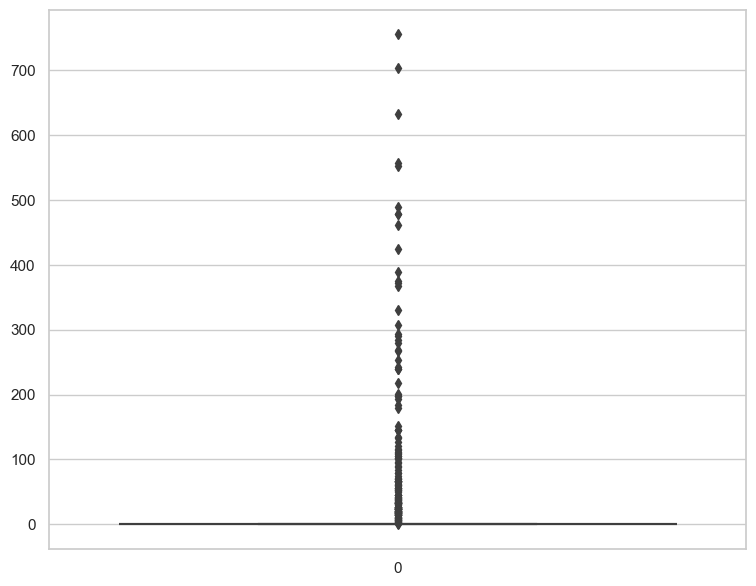

In [291]:
sns.boxplot(df_traffic.transactionRevenue)

In [ ]:
df_traffic["isMobile"].value_counts().plot(kind = "bar")
df_traffic["newVisits"].value_counts().plot(kind = "bar")
df_traffic["bounces"].value_counts().plot(kind = "bar")

In [ ]:
# Crear una figura y ejes para los subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 12))

# Gráfico de barras para la variable 'isMobile'
df_traffic["isMobile"].value_counts().plot(kind="bar", ax=axes[0], color='blue')
axes[0].set_title("isMobile")

# Gráfico de barras para la variable 'newVisits'
df_traffic["newVisits"].value_counts().plot(kind="bar", ax=axes[1], color='green')
axes[1].set_title("newVisits")

# Gráfico de barras para la variable 'bounces'
df_traffic["bounces"].value_counts().plot(kind="bar", ax=axes[2], color='orange')
axes[2].set_title("bounces")

# Ajustar el diseño de los subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

In [ ]:
# Establecer el estilo de los gráficos
sns.set_style("whitegrid")

# Crear una figura y ejes para los subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 12))

# Colores personalizados para cada gráfico
colors = ['blue', 'green', 'orange']

# Títulos de los gráficos
titles = ['isMobile', 'newVisits', 'bounces']

# Iterar sobre los subplots y las variables
for i, (column, ax) in enumerate(zip(["isMobile", "newVisits", "bounces"], axes.flatten())):
    df_traffic[column].value_counts().plot(kind="bar", ax=ax, color=colors[i])
    ax.set_title(titles[i])
    ax.set_xlabel(column)
    ax.set_ylabel('Count')

# Ajustar el diseño de los subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()


In [180]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def reduce_dimensionality(data, variance_threshold=0.99):
    # Normalizar los datos
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    
    # Aplicar PCA
    pca = PCA(n_components=variance_threshold)
    data_pca = pca.fit_transform(data_scaled)
    
    # Calcular la varianza explicada acumulativa
    explained_variance_ratio_cumulative = pca.explained_variance_ratio_.cumsum()
    
    # Determinar el número de componentes principales para alcanzar el umbral de varianza
    num_components = (explained_variance_ratio_cumulative < variance_threshold).sum() + 1
    
    # Reducir la dimensionalidad utilizando el número de componentes principales determinado
    pca_final = PCA(n_components=num_components)
    data_final = pca_final.fit_transform(data_scaled)
    
    # Devolver los datos reducidos y el número de componentes principales utilizados
    return data_final, num_components

# Ejemplo de uso
# Supongamos que 'data' es tu conjunto de datos continuos
#data_reduced, num_components_used = reduce_dimensionality(data)
#print("Número de componentes principales utilizados:", num_components_used)


In [184]:
reduce_dimensionality(df_continuas)

(array([[-0.52142621,  0.79187664, -0.70828633,  0.1681318 ],
        [-0.52142621,  0.79187664, -0.70828633,  0.1681318 ],
        [-0.52142621,  0.79187664, -0.70828633,  0.1681318 ],
        ...,
        [-0.55132707, -0.82368376,  0.47136456,  0.07192955],
        [-0.38069164, -0.733955  ,  0.59321936,  0.00280139],
        [-0.23613854, -0.84428322,  0.44317878, -0.03254588]]),
 4)

In [182]:
def filter_continuous_variables(df):
    # Obtener los nombres de las columnas que son continuas
    continuous_columns = df.select_dtypes(include=['float64', 'int64']).columns
    
    # Filtrar el DataFrame para incluir solo las columnas continuas
    df_continuous = df[continuous_columns]
    
    return df_continuous

# Ejemplo de uso
# Supongamos que 'df' es tu DataFrame que contiene variables categóricas y continuas
df_continuas = filter_continuous_variables(df_traffic)


#**3.3 Analisis bivariable de las variables del Dataset**


---

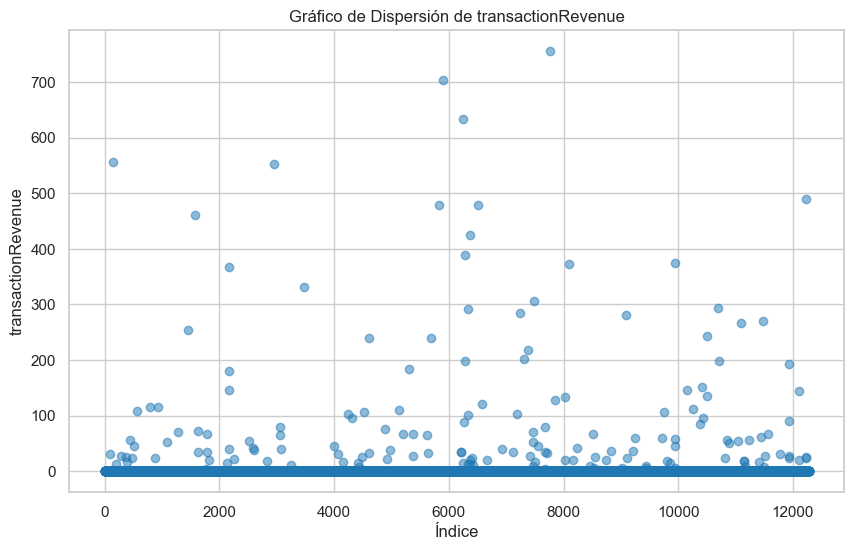

In [295]:
# Grafico de dispersión (antes)
plt.figure(figsize=(10, 6))
plt.scatter(range(len(df_traffic['transactionRevenue'])), df_traffic['transactionRevenue'], alpha=0.5)
plt.title('Gráfico de Dispersión de transactionRevenue')
plt.xlabel('Índice')
plt.ylabel('transactionRevenue')
plt.show()

In [ ]:

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='channelGrouping', y='transactionRevenue', data=df_traffic)
plt.title('Boxplot de transactionRevenue por canal de agrupación')
plt.xlabel('Canal de Agrupación')
plt.ylabel('Transaction Revenue')
plt.show()

# Violinplot
plt.figure(figsize=(10, 6))
sns.violinplot(x='channelGrouping', y='transactionRevenue', data=df_traffic)
plt.title('Violinplot de transactionRevenue por canal de agrupación')
plt.xlabel('Canal de Agrupación')
plt.ylabel('Transaction Revenue')
plt.show()

# Barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='channelGrouping', y='transactionRevenue', data=df_traffic, ci=None)
plt.title('Barplot de transactionRevenue por canal de agrupación')
plt.xlabel('Canal de Agrupación')
plt.ylabel('Transaction Revenue')
plt.show()

# Swarmplot
plt.figure(figsize=(10, 6))
sns.swarmplot(x='channelGrouping', y='transactionRevenue', data=df_traffic)
plt.title('Swarmplot de transactionRevenue por canal de agrupación')
plt.xlabel('Canal de Agrupación')
plt.ylabel('Transaction Revenue')
plt.show()


<Axes: >

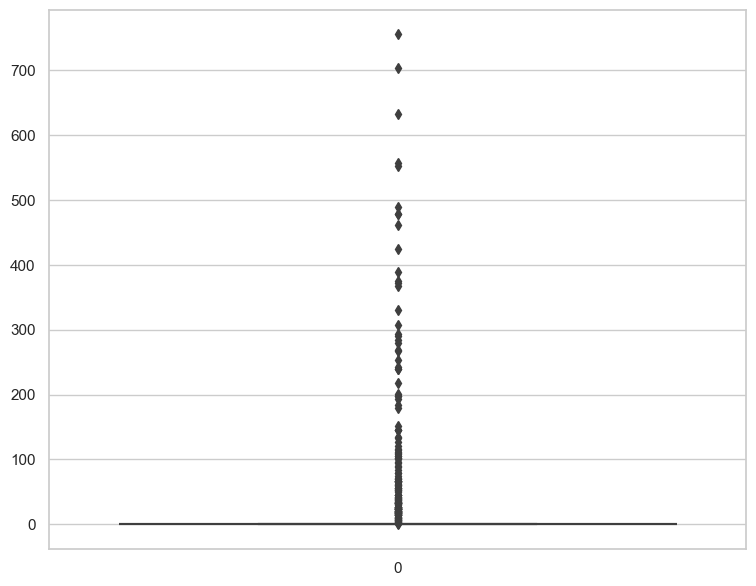

In [281]:
sns.boxplot(df_traffic.transactionRevenue)

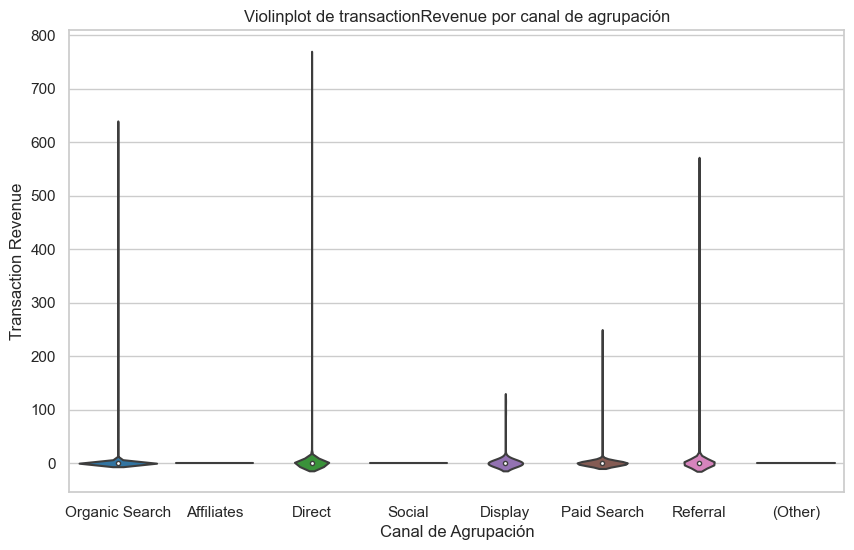

In [ ]:
# Violinplot
plt.figure(figsize=(10, 6))
sns.violinplot(x='channelGrouping', y='transactionRevenue', data=df_traffic)
plt.title('Violinplot de transactionRevenue por canal de agrupación')
plt.xlabel('Canal de Agrupación')
plt.ylabel('Transaction Revenue')
plt.show()

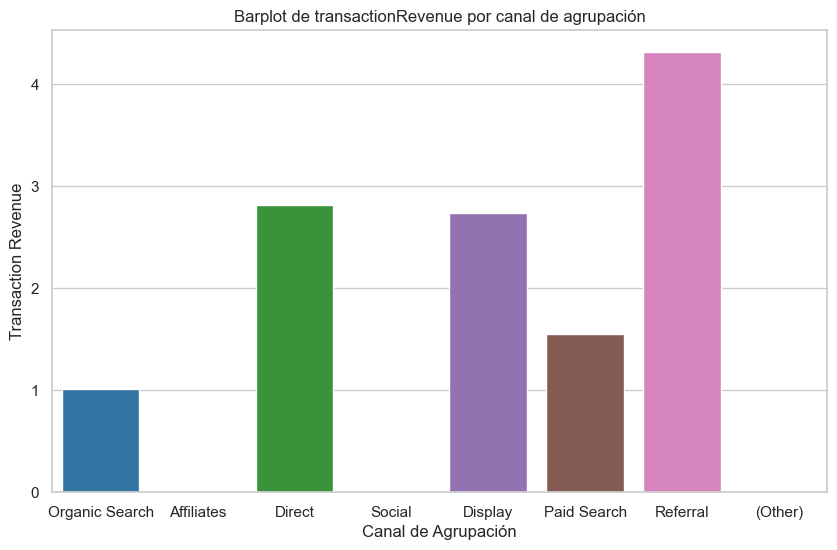

In [303]:
# Barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='channelGrouping', y='transactionRevenue', data=df_traffic, ci=None)
plt.title('Barplot de transactionRevenue por canal de agrupación')
plt.xlabel('Canal de Agrupación')
plt.ylabel('Transaction Revenue')
plt.show()


In [282]:
df_traffic.describe()

,date,visitNumber,visitStartTime,hits,pageviews,transactionRevenue,year,month,quarterMonth,day,weekday,hour
count,12283,12283.000000,12283,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.00000,12283.000000,12283.000000,12283.000000
mean,2017-01-21 17:14:36.040055296,1.923390,2017-01-22 12:17:34.377920768,4.599121,3.846699,1.447871,2016.527233,6.897256,2.63421,15.678173,2.733941,12.534723
min,2016-08-01 00:00:00,1.000000,2016-08-01 07:12:01,1.000000,1.000000,0.000000,2016.000000,1.000000,1.00000,1.000000,0.000000,0.000000
25%,2016-10-27 00:00:00,1.000000,2016-10-28 06:03:31,1.000000,1.000000,0.000000,2016.000000,4.000000,2.00000,8.000000,1.000000,7.000000
50%,2017-01-12 00:00:00,1.000000,2017-01-12 22:03:08,2.000000,1.000000,0.000000,2017.000000,7.000000,3.00000,16.000000,3.000000,14.000000
75%,2017-04-20 00:00:00,1.000000,2017-04-20 11:53:55.500000,4.000000,4.000000,0.000000,2017.000000,10.000000,4.00000,23.000000,4.000000,18.000000
max,2017-08-01 00:00:00,195.000000,2017-08-02 04:28:58,227.000000,145.000000,755.630000,2017.000000,12.000000,4.00000,31.000000,6.000000,23.000000
std,NaN,5.878228,NaN,9.222070,6.747042,20.893896,0.499278,3.497555,1.14917,8.790320,1.918943,6.803641


In [283]:
conteo = df_traffic['transactionRevenue'].value_counts().sort_values(ascending=False)
conteo

transactionRevenue
0.00      12119
33.59         3
19.19         3
13.59         3
4.99          2
          ...  
7.99          1
269.55        1
62.05         1
8.48          1
25.24         1
Name: count, Length: 147, dtype: int64

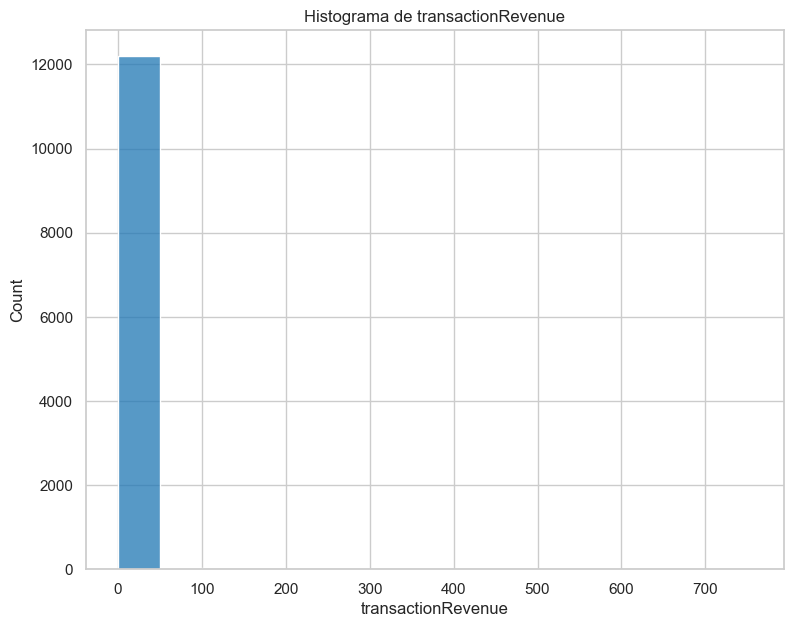

In [273]:
#Histograma (antes)
ax = sns.histplot(data=df_traffic, x='transactionRevenue', kde=False)
ax.set_title('Histograma de transactionRevenue')
ax.set_xlabel('transactionRevenue');

In [272]:
feature_engineering()
df_traffic.sample(5)

,channelGrouping,date,fullVisitorId,visitNumber,visitStartTime,browser,operatingSystem,isMobile,deviceCategory,metro,city,campaign,source,medium,hits,pageviews,bounces,newVisits,transactionRevenue,year,month,quarterMonth,day,weekday,hour
9598,Referral,2017-07-31,5593242612562466455,6,2017-08-01 04:24:21,Chrome,Macintosh,False,desktop,Los Angeles CA,Los Angeles,(not set),moma.corp.google.com,referral,1,1,True,False,0.0,2017,7,3,31,0,4
9785,Social,2017-04-15,8666040539878140495,1,2017-04-16 02:12:17,Chrome,Android,True,mobile,not available in demo dataset,not available in demo dataset,(not set),youtube.com,referral,1,1,True,True,0.0,2017,4,2,15,5,2
1884,Referral,2017-03-20,7234604132712740194,2,2017-03-20 22:54:05,Chrome,Macintosh,False,desktop,Chicago IL,Chicago,(not set),mall.googleplex.com,referral,26,15,False,False,0.0,2017,3,1,20,0,22
4462,Organic Search,2017-02-16,2179100985789810706,1,2017-02-17 02:13:08,Chrome,Windows,False,desktop,(not set),Zurich,(not set),google,organic,1,1,True,True,0.0,2017,2,1,16,3,2
9350,Social,2016-10-24,9499841766081195427,1,2016-10-25 05:47:07,Chrome,Windows,False,desktop,(not set),Fortaleza,(not set),youtube.com,referral,2,2,False,True,0.0,2016,10,4,24,0,5


In [ ]:
df_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12283 entries, 0 to 12282
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   channelGrouping     12283 non-null  int64  
 1   referralPath        12283 non-null  int64  
 2   city                12283 non-null  int64  
 3   metro               12283 non-null  int64  
 4   visitNumber         12283 non-null  int64  
 5   browser             12283 non-null  int64  
 6   operatingSystem     12283 non-null  int64  
 7   isMobile            12283 non-null  bool   
 8   deviceCategory      12283 non-null  int64  
 9   campaign            12283 non-null  int64  
 10  source              12283 non-null  int64  
 11  medium              12283 non-null  int64  
 12  hits                12283 non-null  int64  
 13  pageviews           12283 non-null  int64  
 14  bounces             12283 non-null  int64  
 15  newVisits           12283 non-null  int64  
 16  tran

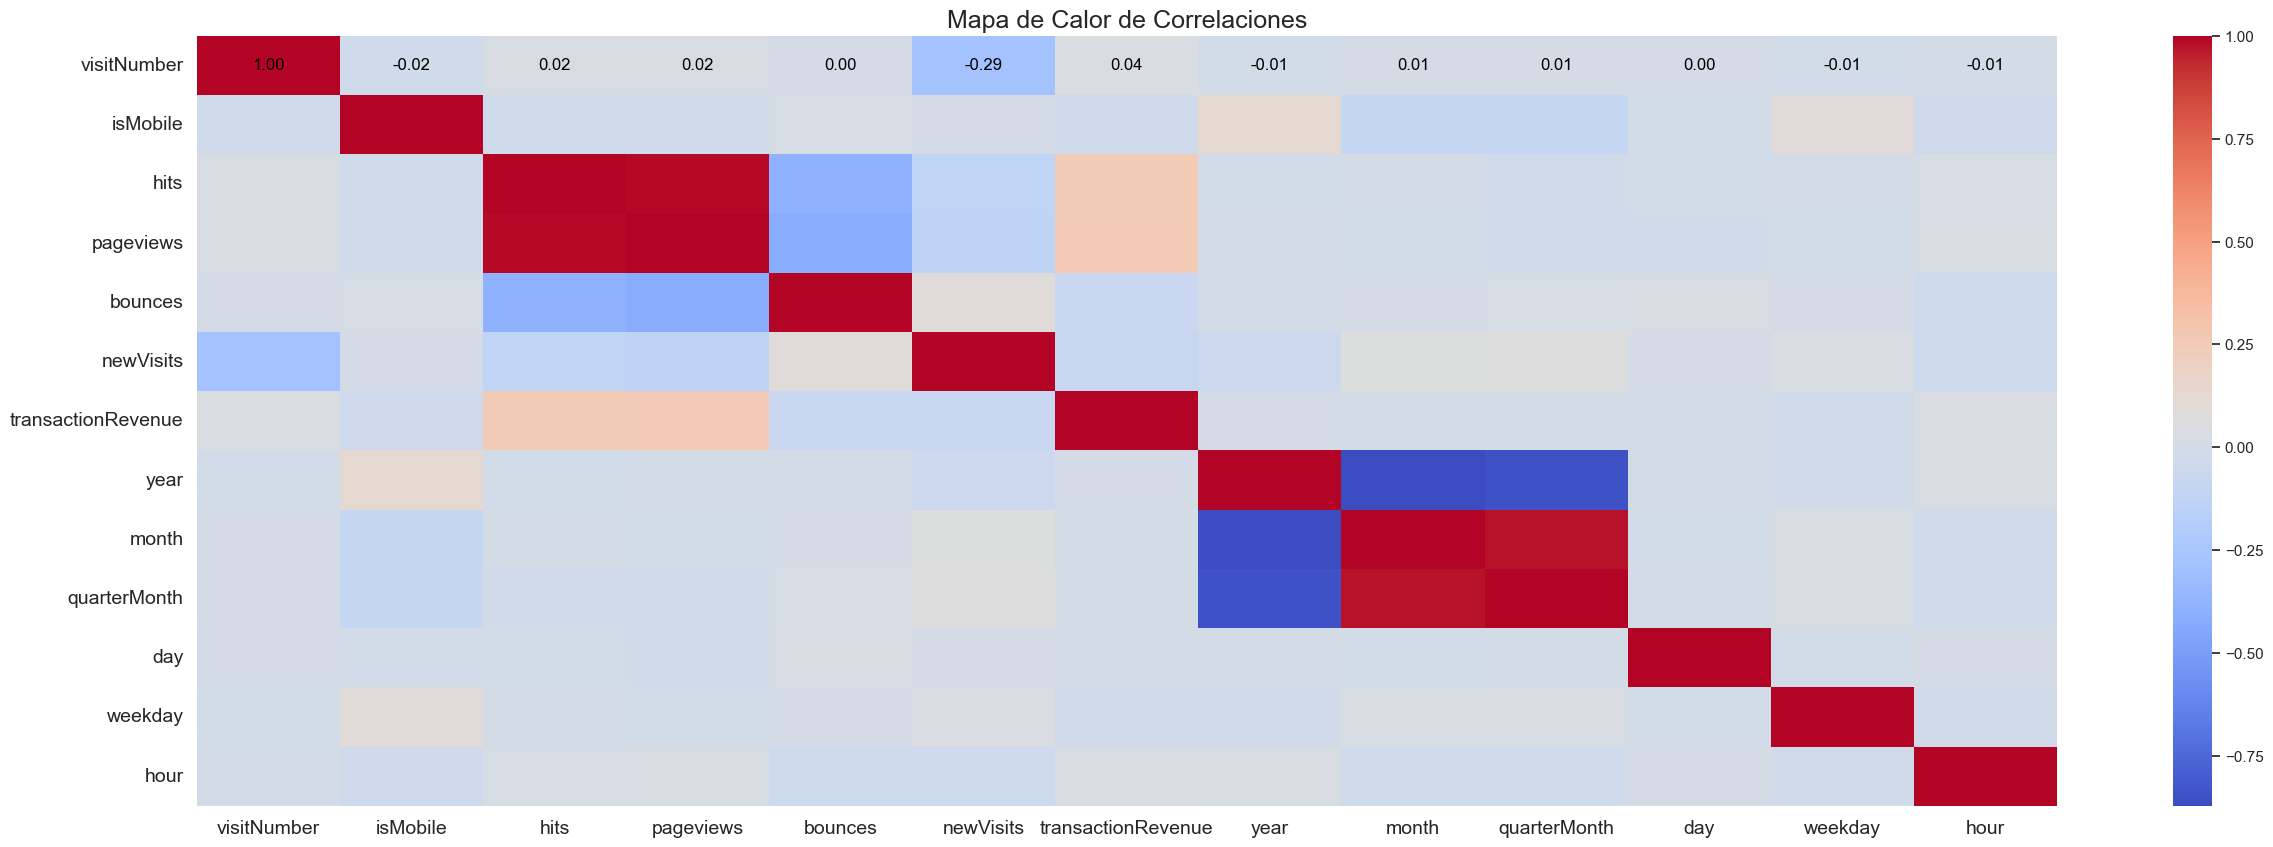

In [298]:
plt.figure(figsize=(30, 10))
heatmap = sns.heatmap(df_traffic.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"color": "black"})
heatmap.tick_params(axis='both', which='major', labelsize=14)
plt.title('Mapa de Calor de Correlaciones', fontsize=18)
plt.show()


#**4. Construcción de Modelos**


---


In [ ]:
crea_modelos()
for i, model in enumerate(resultados['Model']):
    print('-------------------------------')
    print(f"Modelo: {model}")
    print(f"R-cuadrado (R²): {resultados['R2'][i]}")
    print(f"Error cuadrático medio (MSE): {resultados['MSE'][i]}")
    print(f"Raíz del error cuadrático medio (RMSE): {resultados['RMSE'][i]}")
    print('-------------------------------')

Training until validation scores don't improve for 500 rounds
Did not meet early stopping. Best iteration is:
[699]	valid_0's rmse: 14.5269
-------------------------------
Modelo: Regresión Lineal
R-cuadrado (R²): 27.568435610639252
Error cuadrático medio (MSE): 276.52011601208096
Raíz del error cuadrático medio (RMSE): 16.62889401048912
-------------------------------
-------------------------------
Modelo: Random Forest
R-cuadrado (R²): 37.60157434910354
Error cuadrático medio (MSE): 238.21686091445994
Raíz del error cuadrático medio (RMSE): 15.434275522824514
-------------------------------
-------------------------------
Modelo: LightGBM
R-cuadrado (R²): 45.33869593029468
Error cuadrático medio (MSE): 208.67905132457332
Raíz del error cuadrático medio (RMSE): 14.445727787985392
-------------------------------
-------------------------------
Modelo: XGBoost
R-cuadrado (R²): 41.81389067868423
Error cuadrático medio (MSE): 222.13560946069006
Raíz del error cuadrático medio (RMSE): 14.

#**5. Evaluación y Selección del Modelo**


---


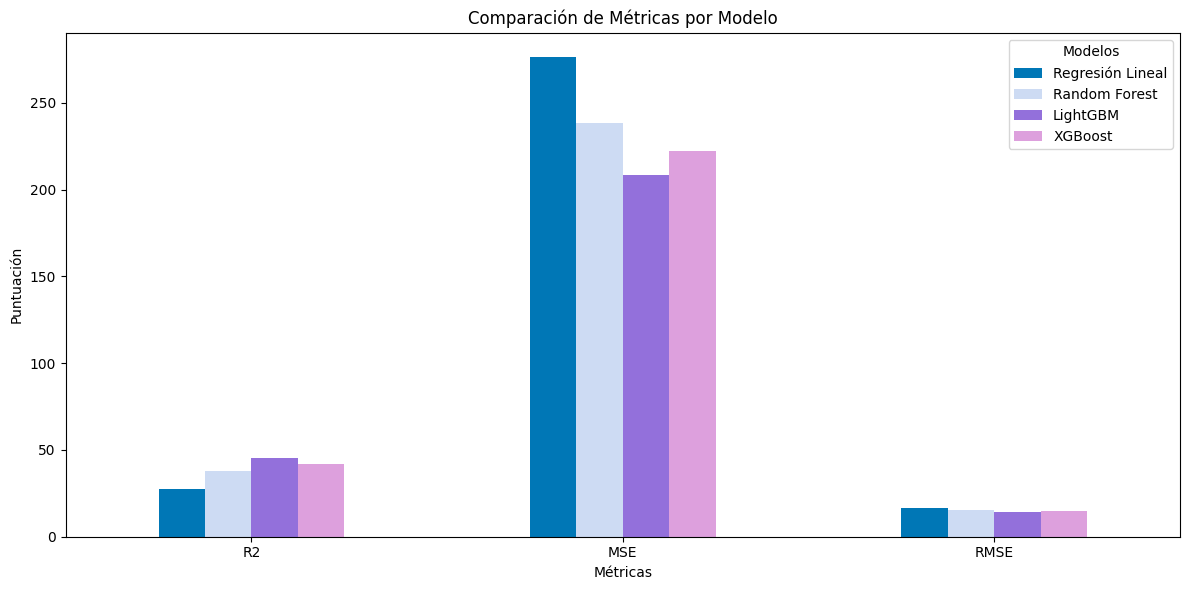

In [ ]:
visualiza_resultados()

#**6. Producción**


---


In [ ]:
#Cargar base de prueba y ejecutar normalización utilizada en nuestro modelo
df_traffic = pd.read_csv('https://raw.githubusercontent.com/ElProfeAlejo/Bootcamp_Databases/main/traffic_test.csv', dtype={'date':object,'fullVisitorId':object,'visitId':object})
preprocesamiento()
feature_engineering()

#Cargar el modelo entrenado
wget.download('https://raw.githubusercontent.com/ElProfeAlejo/Bootcamp_Databases/main/modelo.joblib', 'modelo.joblib')
modelo = load('modelo.joblib')
wget.download('https://raw.githubusercontent.com/ElProfeAlejo/Bootcamp_Databases/main/modelo_clasificacion.joblib', 'modelo_clasificacion.joblib')
modelo_clasificacion = load('modelo_clasificacion.joblib')

#Pronosticar con la nueva base
X = df_traffic.drop('transactionRevenue',axis=1)
X['clasificacion'] = modelo_clasificacion.predict(X)
y = df_traffic.transactionRevenue.copy()
predictions = modelo.predict(xgb.DMatrix(X))
predictions[predictions < 1] = 0

#Genera algunas métricas de evaluación de los pronosticos
r2 = r2_score(y, predictions)*100
mse = mean_squared_error(y, predictions)
rmse = np.sqrt(mse)
print(f"R-cuadrado (R²): {r2}")
print(f"Error cuadrático medio (MSE): {mse}")
print(f"Raíz del error cuadrático medio (RMSE): {rmse}")

R-cuadrado (R²): 27.66225465437313
Error cuadrático medio (MSE): 281.0448336236674
Raíz del error cuadrático medio (RMSE): 16.76439183578299


In [ ]:
#Ejemplos de los pronósticos
df_resultados = pd.DataFrame({
    'transactionRevenue': y,
    'predictions': predictions
})
df_resultados[df_resultados.transactionRevenue>0].sample(10)

,transactionRevenue,predictions
656,192.87,184.523697
657,27.18,131.177628
655,23.97,0.000000
192,269.55,23.365696
276,66.96,3.251449
820,144.97,12.033607
832,19.19,18.876350
939,489.20,376.300415
654,89.99,0.000000
948,23.95,22.540262
